In [1]:
# importamos las librerias que omcuparemos, en caso de omitir alguna, se agregará al momento de realizar el código
import pandas as pd
import numpy as np
import matplotlib.pyplot as mp
import seaborn as sb
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA


In [2]:
# Comando para ocultar los avisos de advertencia
import warnings 
warnings.filterwarnings("ignore")

In [3]:
# Cargamos los datos
dataset = pd.read_csv('iris.csv')
dataset.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [4]:
# Seleccionamos los datos
fields = dataset.iloc[:,[0,1,2,3]].values
print(fields)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

In [5]:
# Se inicializa una lista vacía llamada wcss. Esta lista se utilizará para almacenar la Suma de Cuadrados Dentro del Clúster (Within-Cluster Sum of Squares) para diferentes números de clústeres.
wcss = []
for index in range(1,11): # Se inicia un bucle for que itera sobre los números enteros desde 1 hasta 10 (inclusive)
    kmeans = KMeans(n_clusters = index, init = "k-means++", random_state = 2) #En cada iteración del bucle, se crea una instancia del algoritmo K-Means n_clusters=index
    kmeans.fit(fields) #El método fit() calcula los centroides de los clústeres 
    wcss.append(kmeans.inertia_) # El valor de kmeans.inertia_ para el modelo con el número actual de clústeres 

  File "/home/9e16b0a4-46cf-4ed8-a80e-6fb1cbba99a2/.local/lib/python3.11/site-packages/joblib/externals/loky/backend/context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


Text(0, 0.5, 'WCSS')

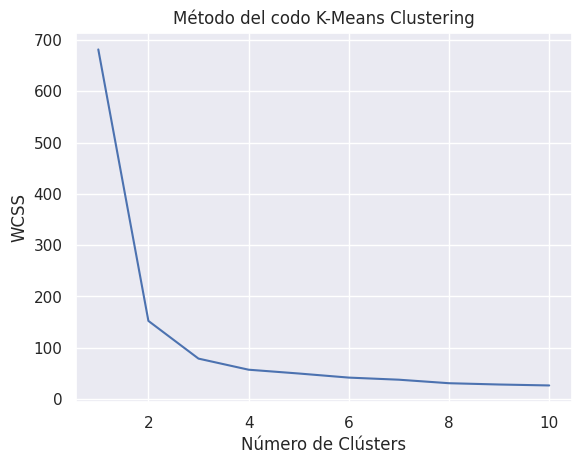

In [6]:
# Graficación del "Codo de Jambu"
import seaborn as sb
sb.set() 
mp.plot(range(1,11), wcss) 
# Colocamos los títulos
mp.title("Método del codo K-Means Clustering") 
mp.xlabel("Número de Clústers")
mp.ylabel("WCSS") 

In [7]:
#  utiliza el algoritmo K-Means para realizar la agrupación (clustering) de los datos contenidos en la variable fields, basándose en la decisión de utilizar 3 clústeres.
kmeans = KMeans(n_clusters = 3, init = "k-means++", random_state = 42)
# El algoritmo K-Means se ajusta (entrena) a los datos contenidos en la variable fields
cluster_values = kmeans.fit_predict(fields)
print(cluster_values)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 0 0 2 0 0 0 0
 0 0 2 2 0 0 0 0 2 0 2 0 2 0 0 2 2 0 0 0 0 0 2 0 0 0 0 2 0 0 0 2 0 0 0 2 0
 0 2]


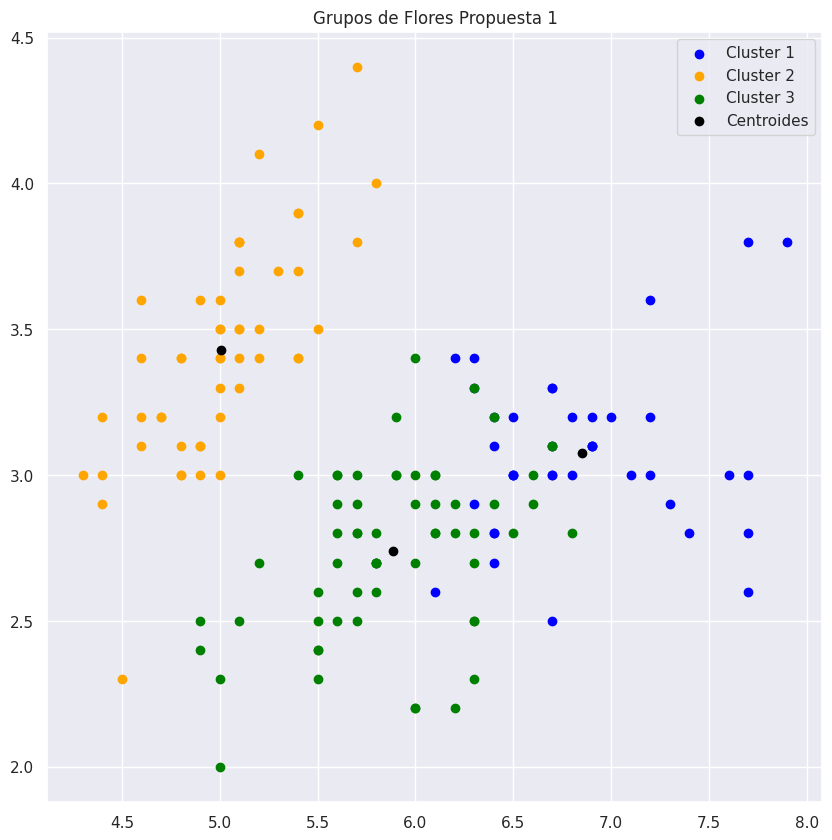

In [8]:
#  Generamos un código para que se encargue de visualizar los resultados del clustering K-Means que se realizó en el paso anterior
import matplotlib.pyplot as mp
mp.figure(figsize = (10,10)) # crear una nueva figura para la gráfica de 10" x 10"
# la función scatter() de matplotlib.pyplot para dibujar los puntos de datos en un diagrama de dispersión. Cada línea representa los puntos asignados a un clúster diferente
mp.scatter(fields[cluster_values==0,0], fields[cluster_values==0,1], c='blue', label='Cluster 1')
mp.scatter(fields[cluster_values==1,0], fields[cluster_values==1,1], c='orange', label='Cluster 2')
mp.scatter(fields[cluster_values==2,0], fields[cluster_values==2,1], c='green', label='Cluster 3')

# utilizamos scatter() para dibujar los centroides de los clústeres que fueron calculados por el algoritmo K-Means
mp.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], c='black', label='Centroides')

# Colocar etiquetas y leyendas
mp.title("Grupos de Flores Propuesta 1")
mp.legend()

# Mostrar la gráfica
mp.show()

# Criterio de Silueta ("Silhouette")

In [9]:
# Estas son las librerias que se utilizarán para obtener los datos
from sklearn import datasets
from sklearn.metrics import silhouette_score

In [10]:
# Definimos a X
X = dataset.iloc[:, [0,1,2,3]].to_numpy()
for j in range(2,12):
   #Crea una instancia del algoritmo K-Means con j como el número de clústeres.
    kmeans = KMeans(n_clusters = j, random_state = 42)
    #Ejecuta el algoritmo K-Means sobre los datos X
    kmeans.fit_predict(X)
    # Calculamos el Score de Silueta para la agrupación obtenida por K-Means.
    score = silhouette_score(X, kmeans.labels_, metric='euclidean')
    print("Score Silhouette: ", "k = ", j, ":", score)

Score Silhouette:  k =  2 : 0.6810461692117467
Score Silhouette:  k =  3 : 0.5511916046195927
Score Silhouette:  k =  4 : 0.4976433179321929
Score Silhouette:  k =  5 : 0.493080406719353
Score Silhouette:  k =  6 : 0.3678464984712254
Score Silhouette:  k =  7 : 0.3542978877198859
Score Silhouette:  k =  8 : 0.3446797218056205
Score Silhouette:  k =  9 : 0.31558878533897855
Score Silhouette:  k =  10 : 0.3014143745325153
Score Silhouette:  k =  11 : 0.2687356216412037


In [11]:
# Algoritmo Kmeans aplicado a dos columnas de nuestra base original bajo una tranformación de pCA
fields2 = dataset.iloc[:, [0,1,2,3]].values
print(fields2)


[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

In [12]:
from sklearn import decomposition
# Crea una instancia del objeto PCA del módulo decomposition
pca = decomposition.PCA(n_components=2)
# Aplica el algoritmo PCA a los datos contenidos en fields2
pca.fit(fields2)
# El resultado de esta transformación (los valores de los datos proyectados en los dos componentes principales) se asigna de nuevo a la variable fields2, reemplazando así los datos originales de 3 dimensiones con los datos transformados de 2 dimensiones.
fields2 = pca.transform(fields2)
# Pedimos que nos muetre el resultado
fields2

array([[-2.68412563,  0.31939725],
       [-2.71414169, -0.17700123],
       [-2.88899057, -0.14494943],
       [-2.74534286, -0.31829898],
       [-2.72871654,  0.32675451],
       [-2.28085963,  0.74133045],
       [-2.82053775, -0.08946138],
       [-2.62614497,  0.16338496],
       [-2.88638273, -0.57831175],
       [-2.6727558 , -0.11377425],
       [-2.50694709,  0.6450689 ],
       [-2.61275523,  0.01472994],
       [-2.78610927, -0.235112  ],
       [-3.22380374, -0.51139459],
       [-2.64475039,  1.17876464],
       [-2.38603903,  1.33806233],
       [-2.62352788,  0.81067951],
       [-2.64829671,  0.31184914],
       [-2.19982032,  0.87283904],
       [-2.5879864 ,  0.51356031],
       [-2.31025622,  0.39134594],
       [-2.54370523,  0.43299606],
       [-3.21593942,  0.13346807],
       [-2.30273318,  0.09870885],
       [-2.35575405, -0.03728186],
       [-2.50666891, -0.14601688],
       [-2.46882007,  0.13095149],
       [-2.56231991,  0.36771886],
       [-2.63953472,

In [13]:
# determinamos para este método el número óptimo de clústeres para los datos transformados por PCA 
wcss2 = []
for index in range(1,11):
    kmeans = KMeans(n_clusters = index, init = "k-means++", random_state = 2)
    kmeans.fit(fields2)
    wcss2.append(kmeans.inertia_)

Text(0, 0.5, 'WCSS')

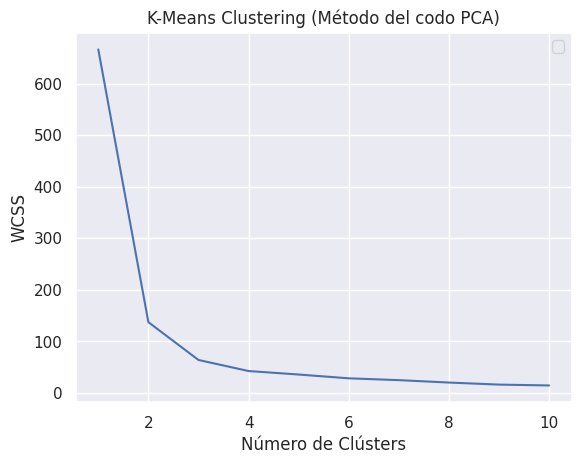

In [14]:
# Graficación del "Codo de Jambu"
import matplotlib.pyplot as mp
import seaborn as sb
sb.set()
mp.plot(range(1,11), wcss2)
mp.title("K-Means Clustering (Método del codo PCA)")
mp.legend()
mp.xlabel("Número de Clústers")
mp.ylabel("WCSS")


In [15]:
# Corremos código para ver la clasificación de los datos al cluster
kmeans = KMeans(n_clusters = 3, init = "k-means++", random_state = 42)
cluster_values = kmeans.fit_predict(fields2)
print(cluster_values)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 0 0 2 0 0 0 0
 0 0 2 2 0 0 0 0 2 0 2 0 2 0 0 2 2 0 0 0 0 0 2 0 0 0 0 2 0 0 0 2 0 0 0 2 0
 0 2]


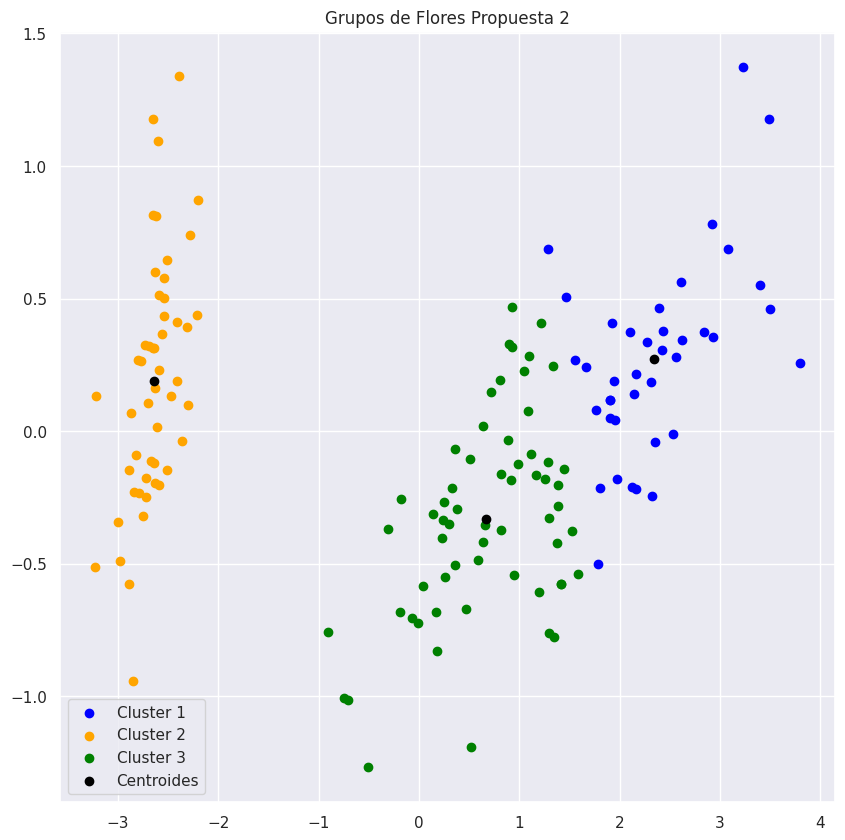

In [16]:
# Corremos código para visualizarlo de manera gráfica
import matplotlib.pyplot as mp
mp.figure(figsize = (10,10))
mp.scatter(fields2[cluster_values==0,0], fields2[cluster_values==0,1], c='blue', label='Cluster 1')
mp.scatter(fields2[cluster_values==1,0], fields2[cluster_values==1,1], c='orange', label='Cluster 2')
mp.scatter(fields2[cluster_values==2,0], fields2[cluster_values==2,1], c='green', label='Cluster 3')

mp.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], c='black', label='Centroides')

mp.title("Grupos de Flores Propuesta 2")

mp.legend()

# Mostrar la gráfica
mp.show()


### Comparación de los resultados 
 Se analizan los dos métodos de clustering presentados en el código desarrollado.
- **Propuesta 1:** Clustering directo sobre los datos originales sin transformaciones adicionales.
- **Propuesta 2:** Clustering después de aplicar la técnica de Análisis de Componentes Principales (PCA) para reducir la dimensionalidad de los datos.

Para ambos métodos utilizamos el **Método del Codo (Elbow Method)**, esto para encontrar el número óptimo de clusters generados en la Suma de Cuadrados Dentro del Cluster (WCSS) . Además, utilizamos el Índice de Silueta para evaluar la calidad de los clusters, como resultado ambos métodos coinciden en que 3 clusters es el número óptimo.

En los **gráficos de dispersión** que generamos observamos la distribución los datos en cada propuesta de manera distinta, ya que para la **propuesta 1** los clusters parecen bien definidos y separados, con centroides no muy claros. pero en la **propuesta 2** los datos se proyectan en 2 componentes principales obtenidos mediante PCA, aunque los clusters también parecen bien definidos, la proyección puede distorsionar la estructura original de los datos, especialmente si la reducción de dimensionalidad elimina información relevante.

Al observar la **Calidad de los Clusters** ambos métodos producen clusters bien definidos, como se observa en los gráficos de dispersión. Sin embargo, la Propuesta 1 mantiene la integridad de los datos originales, lo que puede ser crucial para una interpretación precisa de los resultados.

#### ¿Obtuviste los mismos resultados de agrupamiento?
No
#### Comentarios sobre las ventajas práctica de haber efectuado la transformación por PCA antes de aplicar el algoritmo K-Medias.
Para nuestra **propuesta 1** podemos ver ventajas como que en este caso conservamos toda la información original de los datos, por lo que podemos decir que es más intuitivo y fácil de interpretar porque no se pierde información debido a la reducción de dimensionalidad, además los clusters reflejan directamente las relaciones entre las variables originales. Por otro lado la **Propuesta 2** nos da la ventaja de que reduce la dimensionalidad de los datos a 2 componentes principales, lo que facilita la visualización y puede mejorar el rendimiento computacional, tambien eliminamos ruido y redundancia en los datos, en nuestra ultima gráfica podemos visiblemente ver una mejor agrupación de los datos.